In [19]:
import pandas as pd
import os
import numpy as np

THRESHOLD = 2
ROWS = 0
COLUMNS = 1

# depending on the OS the path to the data file is different
if os.name == 'nt':
    data = pd.read_csv(r'..\data\data-with-selected-features.csv')
elif os.name == 'posix':
    data = pd.read_csv(r'../data/data-with-selected-features.csv')


In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# split data into train and test sets
train, test = train_test_split(data, test_size=0.2)

In [21]:
# use nutrition columns as features
X_COLS = list(data.columns[3:])

# use classification column as target
y_COL = data.columns[1]

print(f"X_COLS: {X_COLS}")
print(f"y_COL: {y_COL}")

X_COLS: ['Energy with dietary fibre, equated \n(kJ)', 'Energy, without dietary fibre, equated \n(kJ)', 'Moisture (water) \n(g)', 'Protein \n(g)', 'Nitrogen \n(g)', 'Fat, total \n(g)', 'Ash \n(g)', 'Total sugars (g)', 'Starch \n(g)', 'Available carbohydrate, without sugar alcohols \n(g)', 'Available carbohydrate, with sugar alcohols \n(g)', 'Calcium (Ca) \n(mg)', 'Iodine (I) \n(ug)', 'Iron (Fe) \n(mg)', 'Magnesium (Mg) \n(mg)', 'Phosphorus (P) \n(mg)', 'Potassium (K) \n(mg)', 'Selenium (Se) \n(ug)', 'Sodium (Na) \n(mg)', 'Zinc (Zn) \n(mg)', 'Thiamin (B1) \n(mg)', 'Riboflavin (B2) \n(mg)', 'Niacin (B3) \n(mg)', 'Niacin derived from tryptophan \n(mg)', 'Niacin derived equivalents \n(mg)', 'Pyridoxine (B6) \n(mg)', 'Cobalamin (B12) \n(ug)', 'Folate, natural \n(ug)', 'Total folates \n(ug)', 'Dietary folate equivalents \n(ug)', 'Vitamin D3 equivalents \n(ug)', 'C18 (g)', 'Total saturated fatty acids, equated \n(g)', 'Total monounsaturated fatty acids, equated \n(g)', 'C18:2w6 (g)', 'Total tr

In [22]:
# create design matrix X and predictions y
X_train = train[X_COLS]
y_train = train[y_COL]
X_test = test[X_COLS]
y_test = test[y_COL]

# sample some rows of training set and their labels
print(f"X_train: {X_train.head()}")
print("Labels:", y_train.iloc[:5].reset_index(drop=True).values)

# sample some rows of test set and their labels
print(f"X_test: {X_test.head()}")
print("Labels:", y_test.iloc[:5].reset_index(drop=True).values)

X_train:       Energy with dietary fibre, equated \n(kJ)   
1093                                        510  \
694                                        1295   
1369                                       1597   
1104                                       2114   
873                                         498   

      Energy, without dietary fibre, equated \n(kJ)  Moisture (water) \n(g)   
1093                                            510                    74.1  \
694                                            1079                     9.7   
1369                                           1597                     0.0   
1104                                           2114                    30.5   
873                                             498                    72.7   

      Protein \n(g)  Nitrogen \n(g)  Fat, total \n(g)  Ash \n(g)   
1093           18.4            2.95               5.3        1.4  \
694            36.9            6.46               7.7        2.8   
1369 

# Linear Regression

In [23]:
import random
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
train, test = train_test_split(data, test_size=0.2)

# sample some rows of training set
X_train.sample(10)

,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total sugars (g),Starch \n(g),"Available carbohydrate, without sugar alcohols \n(g)",...,Dietary folate equivalents \n(ug),Vitamin D3 equivalents \n(ug),C18 (g),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),"Total trans fatty acids, imputed \n(mg)",Cholesterol \n(mg),Tryptophan \n(mg/gN),Tryptophan \n(mg)
1437,146,117,87.4,0.8,0.12,0.1,0.6,6.0,0.0,6.0,...,23,0.00,NaN,0.00,0.00,0.00,0.00,0,NaN,12
1272,437,437,73.4,23.3,3.73,1.1,1.1,0.0,0.0,0.0,...,0,2.20,0.06,0.28,0.20,0.02,15.32,104,72.0,268
153,1050,1017,38.2,9.5,1.66,2.0,1.8,3.1,43.1,46.2,...,357,0.00,0.06,0.28,0.69,0.67,15.82,0,55.0,91
618,175,156,87.6,1.0,0.16,0.0,0.5,8.2,0.0,8.2,...,62,0.00,NaN,0.00,0.00,0.00,0.00,0,49.0,8
179,1149,1097,33.1,10.5,1.82,4.4,1.9,2.8,41.8,44.7,...,302,0.00,NaN,0.52,1.21,1.72,13.30,0,NaN,111
918,633,633,69.9,20.8,3.32,7.6,1.0,0.0,0.0,0.0,...,16,2.84,1.19,2.93,3.01,0.30,505.71,70,NaN,182
669,137,108,87.7,0.1,0.02,2.7,0.4,0.4,0.0,0.4,...,347,0.00,0.22,1.02,0.45,0.44,0.00,0,27.0,0
1193,2904,2853,3.0,14.4,2.71,69.2,1.8,2.7,0.3,3.0,...,70,0.00,0.20,4.43,12.11,43.33,20.51,0,79.0,214
1457,200,115,81.7,1.4,0.22,0.4,0.9,4.2,0.0,4.2,...,52,0.00,NaN,0.00,0.00,0.00,0.00,0,87.0,19
318,1480,1466,11.9,3.4,0.54,1.1,0.6,0.3,80.2,80.5,...,9,0.00,0.01,0.14,0.25,0.32,0.00,0,72.0,39


In [25]:
X_COLS = list(data.columns[5:])
y_COL = data.columns[4]

print(f"X_COLS: {X_COLS}")
print(f"y_COL: {y_COL}")

# create design matrix X and predictions y
X_train = train[X_COLS]
y_train = train[y_COL]
X_test = test[X_COLS]
y_test = test[y_COL]

# sample some rows of training set and their labels
X_train.head()
y_train.head()

X_COLS: ['Moisture (water) \n(g)', 'Protein \n(g)', 'Nitrogen \n(g)', 'Fat, total \n(g)', 'Ash \n(g)', 'Total sugars (g)', 'Starch \n(g)', 'Available carbohydrate, without sugar alcohols \n(g)', 'Available carbohydrate, with sugar alcohols \n(g)', 'Calcium (Ca) \n(mg)', 'Iodine (I) \n(ug)', 'Iron (Fe) \n(mg)', 'Magnesium (Mg) \n(mg)', 'Phosphorus (P) \n(mg)', 'Potassium (K) \n(mg)', 'Selenium (Se) \n(ug)', 'Sodium (Na) \n(mg)', 'Zinc (Zn) \n(mg)', 'Thiamin (B1) \n(mg)', 'Riboflavin (B2) \n(mg)', 'Niacin (B3) \n(mg)', 'Niacin derived from tryptophan \n(mg)', 'Niacin derived equivalents \n(mg)', 'Pyridoxine (B6) \n(mg)', 'Cobalamin (B12) \n(ug)', 'Folate, natural \n(ug)', 'Total folates \n(ug)', 'Dietary folate equivalents \n(ug)', 'Vitamin D3 equivalents \n(ug)', 'C18 (g)', 'Total saturated fatty acids, equated \n(g)', 'Total monounsaturated fatty acids, equated \n(g)', 'C18:2w6 (g)', 'Total trans fatty acids, imputed \n(mg)', 'Cholesterol \n(mg)', 'Tryptophan \n(mg/gN)', 'Tryptophan \n

867      541
775      572
1253    1266
168     1154
149     1240
Name: Energy, without dietary fibre, equated \n(kJ), dtype: int64

In [26]:
# create and fit linear model
lm = LinearRegression()

# replace NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

lm.fit(X_train, y_train)

/var/folders/lh/zkgkhqb15kzgylp6c57ssn1r0000gn/T/ipykernel_51820/2321204165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(0, inplace=True)
/var/folders/lh/zkgkhqb15kzgylp6c57ssn1r0000gn/T/ipykernel_51820/2321204165.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(0, inplace=True)


LinearRegression()

In [27]:
# get intercepts and coefficients
print(f"Intercept: {lm.intercept_}")
print(f"Coefficients: {lm.coef_}")

# get the MSE
y_pred = lm.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

Intercept: 315.4792158581504
Coefficients: [-2.92178910e+00  1.26909762e+01  3.75999441e+00  3.30240433e+01
 -3.49534761e+00  1.11454261e+00  1.97671551e+00  1.26007554e+00
  1.04659950e+01 -3.94478754e-03 -6.99583544e-03 -6.55453082e-01
 -2.18501372e-01  4.03759035e-02 -9.08109475e-04  9.40789283e-03
  1.65359675e-03  1.46809918e-01 -5.16418807e-01  2.92911379e+00
  1.46961165e+00  1.50749898e+02 -2.18862649e+00 -7.93470572e+00
  4.39069982e-01 -7.50282570e-01  1.71577829e+00 -1.02053689e+00
 -6.70831821e-01  1.39525099e+00  6.71964686e-01  1.20601315e+00
  9.71444821e-01 -3.53001161e-03 -4.83867664e-03 -1.59772084e-01
 -2.48507302e+00]
MSE: 1713.9613622188458


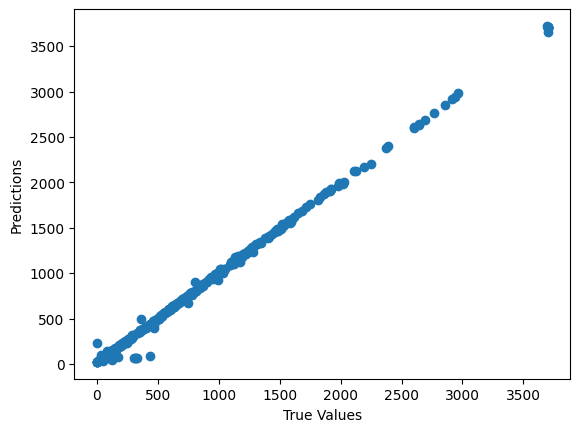

In [28]:
# visualise
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()